# Effective Portfolio

In [73]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

## Candidate Companies

Recall that we have selected the most profitable company in each sector in the sense of **dollar values**. We now load the tickers of these candidate companies.

In [74]:
with open("../../data/companies.json", "r") as f:
    companies: list[str] = json.load(f)

companies

['META', 'TSLA', 'XOM', 'BAC', 'UNH', 'BA', 'AAPL']

We then put the closing prices of these companies side by side in a data frame:

In [75]:
num_days = 90

# load data
stocks = pd.read_csv("../../data/stocks.csv", index_col=0, parse_dates=True)[:-num_days]

df_list = []
for company in companies:
    df = stocks.query(f"Company == '{company}'")[["Close"]]
    df.rename(columns={"Close": company}, inplace=True)
    df_list.append(df)

# join stock prices of different companies
df = pd.DataFrame.join(df_list[0], df_list[1:])

# leave last 90 days out
df = df[:-num_days]

df

,META,TSLA,XOM,BAC,UNH,BA,AAPL
Date,,,,,,,
2017-11-02,178.919998,19.950666,83.529999,27.870001,211.100006,262.630005,42.027500
2017-11-03,178.919998,20.406000,83.180000,27.820000,212.869995,261.750000,43.125000
2017-11-06,180.169998,20.185333,83.750000,27.750000,212.119995,264.070007,43.562500
2017-11-07,180.250000,20.403334,83.580002,27.180000,212.699997,266.130005,43.702499
2017-11-08,179.559998,20.292667,83.470001,26.790001,210.770004,265.570007,44.060001
...,...,...,...,...,...,...,...
2022-06-17,163.740005,216.759995,86.120003,31.920000,452.059998,136.800003,131.559998
2022-06-21,157.050003,237.036667,91.480003,32.849998,480.320007,136.750000,135.869995
2022-06-22,155.850006,236.086670,87.860001,32.599998,489.679993,137.160004,135.350006


## Stock Returns

A **stock return** is the change in price of an asset, investment, or project over time, which may be represented in terms of price change or percentage change. In fact, we have already introduced this concept when calculating the profit in a previous section.

$$
\text{Today's Stock Return} = \frac{\text{Today's Price} - \text{Yesterday's Price}}{\text{Yesterday's Price}}
$$

In [76]:
stock_returns = df.pct_change().dropna()
stock_returns = stock_returns.apply(lambda x : np.log(1 + x), axis=1)
stock_returns

,META,TSLA,XOM,BAC,UNH,BA,AAPL
Date,,,,,,,
2017-11-03,0.000000,0.022566,-0.004199,-0.001796,0.008350,-0.003356,0.025779
2017-11-06,0.006962,-0.010873,0.006829,-0.002519,-0.003529,0.008824,0.010094
2017-11-07,0.000444,0.010742,-0.002032,-0.020754,0.002731,0.007771,0.003209
2017-11-08,-0.003835,-0.005439,-0.001317,-0.014453,-0.009115,-0.002106,0.008147
2017-11-09,-0.001449,-0.004610,0.005972,-0.011261,0.003741,-0.010866,-0.002045
...,...,...,...,...,...,...,...
2022-06-17,0.017683,0.017029,-0.059394,0.002195,-0.008875,0.025468,0.011467
2022-06-21,-0.041716,0.089424,0.060379,0.028719,0.060638,-0.000366,0.032236
2022-06-22,-0.007670,-0.004016,-0.040376,-0.007639,0.019300,0.002994,-0.003834


## Volatility

Suppose the proportion / weight of money we want to invest in each stock is $w_i$. Then the **volatility** of the portfolio is given by

$$
\text{Volatility} = \sqrt{\mathbf{w}^\top \Sigma \mathbf{w}}
$$

where $\mathbf{w} = (w_1, \ldots, w_n)^\top$ (assuming there are $n$ companies), and $\Sigma$ is the covariance matrix of the daily stock returns, which can be computed by `np.cov(stock_returns.T)` or `stock_returns.cov()` since `stock_returns` is a `DataFrame`.

Covariance matrix of stock returns, $\Sigma$:

```{tip}
It is recommended to use Pandas' functions when experimenting if your data is a `DataFrame` since the output is somewhat nicer. While in actual production, NumPy is preferred.
```

In [77]:
stock_returns.cov()

,META,TSLA,XOM,BAC,UNH,BA,AAPL
META,0.000664,0.000371,0.000139,0.000207,0.000169,0.000284,0.000311
TSLA,0.000371,0.001678,0.000181,0.000260,0.000193,0.000457,0.000396
XOM,0.000139,0.000181,0.000449,0.000303,0.000172,0.000371,0.000154
BAC,0.000207,0.000260,0.000303,0.000500,0.000216,0.000436,0.000217
UNH,0.000169,0.000193,0.000172,0.000216,0.000362,0.000254,0.000198
BA,0.000284,0.000457,0.000371,0.000436,0.000254,0.001041,0.000295
AAPL,0.000311,0.000396,0.000154,0.000217,0.000198,0.000295,0.000429


Then, the volatility can be calculated by (assuming the weights are all equal)

In [78]:
num_companies = len(companies)

# assign equal weights
weight = np.ones(num_companies) / num_companies

# convert to column vector
weight_vec = weight.reshape((-1, 1))

# volatility
volatility = np.sqrt(weight_vec.T @ np.cov(stock_returns.T) @ weight_vec)
volatility = volatility.item()
volatility

0.01823466003794474

In [79]:
def calc_volatility(stock_returns: pd.DataFrame, weight: np.ndarray) -> float:
    
    # scale weights
    weight = weight / weight.sum()
    
    # convert to column vector
    weight_vec = weight.reshape((-1, 1))
    
    # volatility
    volatility = np.sqrt(weight_vec.T @ np.cov(stock_returns.T) @ weight_vec)
    volatility = volatility.item()
    
    return volatility

## Weighted Stock Returns

For a certain portfolio, the **weighted stock return** is simply the sum of weighted returns of all invested stocks.

$$
\text{Weighted Stock Return} 
= \mathbf{w}^\top \mathbf{r}
= \sum_{i=1}^n w_i r_i
$$

where $r_i$ is the *average* stock return of the $i$-th company.

In [80]:
weighted_stock_return = np.dot(weight, stock_returns.mean().to_numpy())
weighted_stock_return

0.0005017068811196133

In [81]:
def calc_weighted_stock_return(stock_returns: pd.DataFrame, weight: np.ndarray) -> float:
    
    # scale weights
    weight = weight / weight.sum()
    
    return np.dot(weight, stock_returns.mean().to_numpy())

## Monte Carlo Simulation

We generate weight for each company is selected with equal probabilities and then calculate the stock return as well as the volatility.

In [82]:
# set seed
SEED = 7008
rng = np.random.RandomState(SEED)

# the weight for each company is selected with equal probabilities
m = 5000
simulated_weights = rng.random((m, num_companies))

from functools import partial

# calculate volatility for each portfolio
volatilities = np.apply_along_axis(
    partial(calc_volatility, stock_returns),
    axis=1,
    arr=simulated_weights
)

# calculate stock return for each portfolio
weighted_stock_returns = np.apply_along_axis(
    partial(calc_weighted_stock_return, stock_returns),
    axis=1,
    arr=simulated_weights
)

Plot the stock return against the volatility for each portfolio:

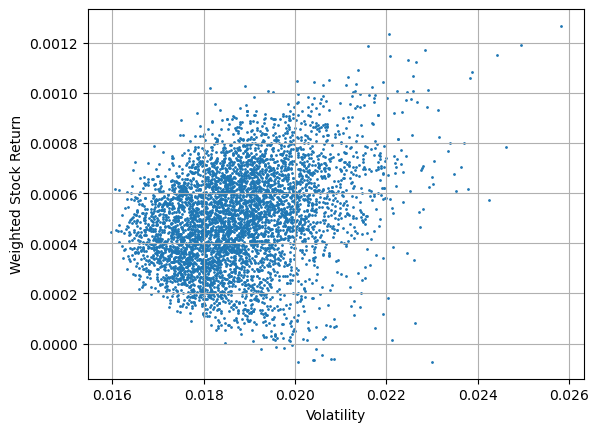

In [83]:
plt.scatter(volatilities, weighted_stock_returns, s=1)
plt.xlabel("Volatility")
plt.ylabel("Weighted Stock Return")
plt.grid()
plt.show()

## Sharpe Ratio

The Sharpe ratio is given by 

$$
\text{Shape Ratio} = \frac{\text{Stock Return}}{\text{Volatility}}
$$

We want the portfolio with as high Sharpe ratio as possible since we prefer high stock return and low volatility.

In [84]:
# calculate Sharpe ratio
sharpe_ratio = weighted_stock_returns / volatilities

# find the portfolio that maximize the sharpe ratio
optimal_weight_ix = np.argmax(sharpe_ratio)
optimal_weight: np.ndarray = simulated_weights[optimal_weight_ix]

# scale the weights
optimal_weight = optimal_weight / optimal_weight.sum()

optimal_weight

array([0.00808913, 0.20070573, 0.10093622, 0.00323051, 0.34447254,
       0.01460107, 0.32796482])

The optimal portfolio is marked as red star in the following plot:

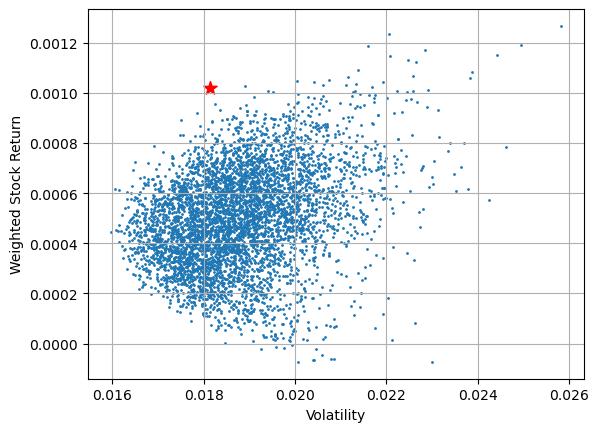

In [85]:
plt.scatter(volatilities, weighted_stock_returns, s=1)
plt.scatter(volatilities[optimal_weight_ix], weighted_stock_returns[optimal_weight_ix], s=100, marker="*", color="r")
plt.xlabel("Volatility")
plt.ylabel("Weighted Stock Return")
plt.grid()
plt.show()